<a href="https://colab.research.google.com/github/SH22Hwang/GNU_AugumentedIntelligenceLab/blob/main/eunsun/chap12_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)


In [4]:
def plot_images(nRow, nCol, img, cmap='gray'):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:         axis = ax[i, j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j], cmap = cmap)

In [5]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [6]:
enc_cnn = models.Sequential([
               layers.Conv2D(filters=16, kernel_size=3,
                                 activation='elu', input_shape=(28,28,1)),
               layers.Conv2D(filters=16, kernel_size=3, activation='elu'),
               layers.Flatten(),
               layers.Dense(100, activation='elu')])
enc_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               921700    
Total params: 924,180
Trainable params: 924,180
Non-trainable params: 0
_________________________________________________________________


In [7]:
dec_cnn = models.Sequential([
      layers.Dense(9216, input_shape=(100, ), activation='elu'),
      layers.Reshape(target_shape=(24,24,16)),
      layers.Conv2DTranspose(filters=16, kernel_size=3, activation='elu'),
      layers.Conv2DTranspose(filters=1, kernel_size=3, activation='elu')])
dec_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 9216)              930816    
_________________________________________________________________
reshape (Reshape)            (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 26, 26, 16)        2320      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 933,281
Trainable params: 933,281
Non-trainable params: 0
_________________________________________________________________


Epoch 1/15
1875/1875 [==============================] - 147s 78ms/step - loss: 757.2557
Epoch 2/15
1875/1875 [==============================] - 150s 80ms/step - loss: 287.8777
Epoch 3/15
1875/1875 [==============================] - 152s 81ms/step - loss: 218.1492
Epoch 4/15
1875/1875 [==============================] - 153s 82ms/step - loss: 184.5120
Epoch 5/15
1875/1875 [==============================] - 153s 82ms/step - loss: 163.2597
Epoch 6/15
1875/1875 [==============================] - 153s 82ms/step - loss: 149.4935
Epoch 7/15
1875/1875 [==============================] - 150s 80ms/step - loss: 139.7142
Epoch 8/15
1875/1875 [==============================] - 151s 81ms/step - loss: 132.2800
Epoch 9/15
1875/1875 [==============================] - 151s 80ms/step - loss: 126.1948
Epoch 10/15
1875/1875 [==============================] - 150s 80ms/step - loss: 121.2977
Epoch 11/15
1875/1875 [==============================] - 151s 80ms/step - loss: 117.2411
Epoch 12/15
1875/1875 [=======

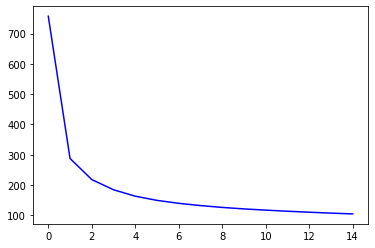

In [8]:
AE_CNN = models.Sequential([enc_cnn, dec_cnn])
AE_CNN.compile(loss = 'mse')
X_cnn = train_images.reshape(-1, 28, 28, 1)
history = AE_CNN.fit(X_cnn, X_cnn, epochs = 15)
plt.plot(history.history['loss'], 'b-')

<Figure size 432x288 with 0 Axes>

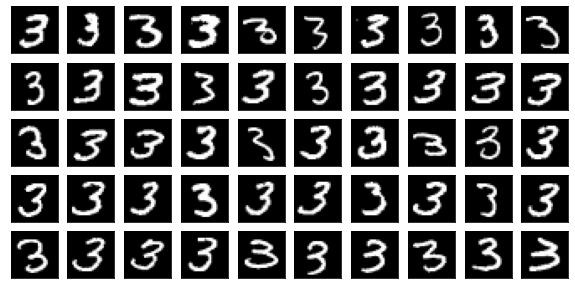

In [9]:
# 3만 인코딩하여 잠재표현을 얻자
three_idx = train_labels == 3    # 드레스의 클래스 번호는 3
three_array = train_images[three_idx]
plot_images(5, 10, three_array.reshape(-1, 28, 28))

(60000, 28, 28)


<Figure size 432x288 with 0 Axes>

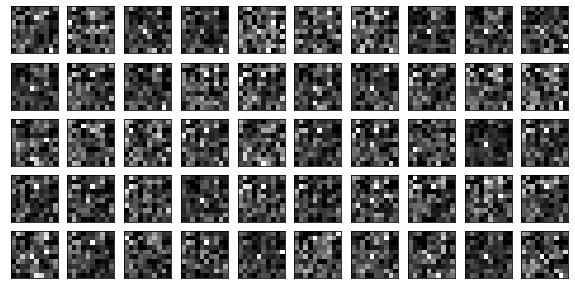

In [10]:
print(train_images.shape)
three_array = three_array.reshape(-1,28,28, 1)
three_encoded = enc_cnn.predict(three_array)
plot_images(5, 10, three_encoded.reshape(-1, 10, 10))

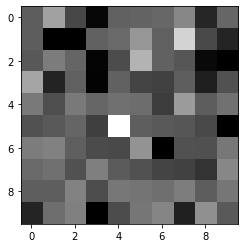

In [11]:
three_latent = three_encoded.mean(axis = 0)
plt.imshow(three_latent.reshape(10,10), cmap='gray')

In [12]:
three_latent_augmented = []
for _ in range(50):
    # 잠재 표현에 잡음 추가
    new_three = three_latent*(1+np.random.randn(100)*0.3)
    three_latent_augmented.append(new_three)  # 잡음 추가된 데이터를 리스트화
# 변형된 잠재 표현의 리스트를 넘파이 배열로 바꾼다.
three_latent_augmented = np.array(three_latent_augmented)

<Figure size 432x288 with 0 Axes>

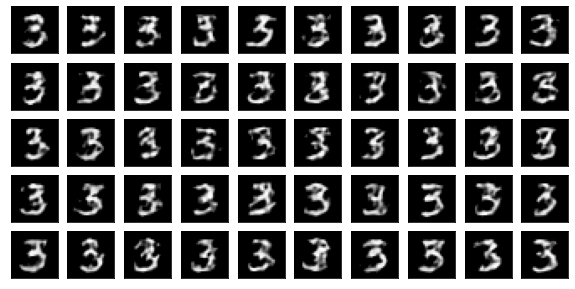

In [13]:
three_generated = dec_cnn.predict([three_latent_augmented])
plot_images(5, 10, three_generated.reshape(-1, 28, 28))